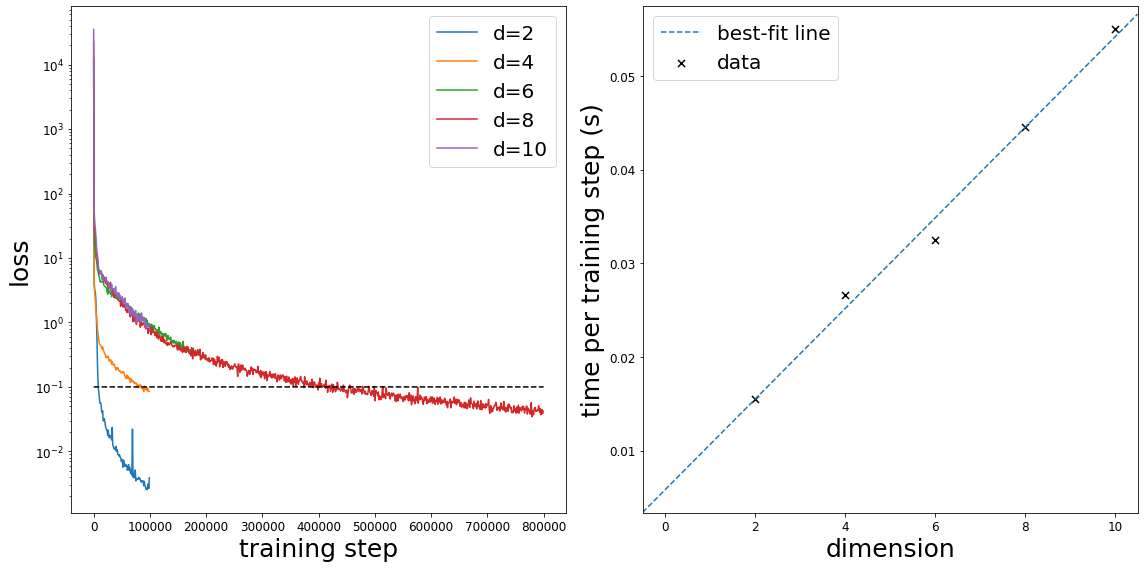

In [3]:
import numpy as np 
import matplotlib.pyplot as plt  

files = ['../data/{}D/train_log.csv'.format(i) for i in [2, 4, 6, 8, 10]]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
for i, file in enumerate(files):
    data = np.genfromtxt(file, delimiter=',')
    ax.semilogy(data[0:-1:100, 0], data[0:-1:100, 1], label='d={}'.format(2*i+2))
r = range(0,800000, 1)
ax.plot(r, [0.1]*len(r), c='black', linestyle='dashed')
plt.legend(fontsize=20)
ax.set_xlabel('training step', fontsize=25)
ax.set_ylabel('loss', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

ts = []
ax1 = fig.add_subplot(122)
for i, file in enumerate(files):
    data = np.genfromtxt(file, delimiter=',')
    ts.append(data[-1, 2] / data[-1, 0])

m, b = np.polyfit([2, 4, 6, 8, 10], ts, deg=1)

ax1.axline(xy1=(0, b), slope=m, label='best-fit line', linestyle="dashed")
ax1.scatter([2, 4, 6, 8, 10], ts, s=50, marker='x', c='black', label="data")
#ax1.plot(data[0:10000:100, 0], [1.]*len(data[0:10000:100, 0]), c='black', linestyle='dashed')

ax1.set_xlabel('dimension', fontsize=25)
ax1.set_ylabel('time per training step (s)', fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig('../data/time_vs_loss.png')